<a href="https://colab.research.google.com/github/MK316/NLP/blob/main/LDA_trial01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing modules
import pandas as pd
import os

In [6]:
os.chdir('/content/')
pdir=os.getcwd(); print(pdir)

In [8]:
#import os
url = "https://raw.githubusercontent.com/MK316/mynltkdata/main/data/paper1.csv"
os.system("curl " + url + " > paper1.csv")

0

In [ ]:
# Read data into papers
papers = pd.read_csv('paper1.csv')
# Print head
papers.head()

In [13]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(5)
# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
0,1987,Self-Organization of Associative Database and ...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
5,1994,Using a neural net to instantiate a deformable...,Abstract Missing,U sing a neural net to instantiate a\ndeformab...
3,1994,Bayesian Query Construction for Neural Network...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1994,"Neural Network Ensembles, Cross Validation, an...",Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."
2,1988,Storing Covariance by the Associative Long-Ter...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...


In [14]:
# Load the regular expression library
import re
# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())
# Print out the first rows of papers
papers['paper_text_processed'].head()

0    767\n\nself-organization of associative databa...
5    u sing a neural net to instantiate a\ndeformab...
3    bayesian query construction for neural\nnetwor...
4    neural network ensembles cross\nvalidation and...
2    394\n\nstoring covariance by the associative\n...
Name: paper_text_processed, dtype: object

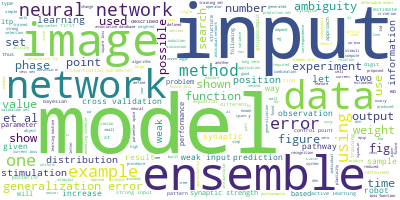

In [15]:
# Import the wordcloud library
from wordcloud import WordCloud
# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [16]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]
data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))
# remove stop words
data_words = remove_stopwords(data_words)
print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
['self', 'organization', 'associative', 'database', 'applications', 'hisashi', 'suzuki', 'suguru', 'arimoto', 'osaka', 'university', 'toyonaka', 'osaka', 'japan', 'abstract', 'efficient', 'method', 'self', 'organizing', 'associative', 'databases', 'proposed', 'together', 'applications', 'robot', 'eyesight', 'systems', 'proposed', 'databases', 'associate']


In [17]:
import gensim.corpora as corpora
# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])

[(0, 1), (1, 1), (2, 1), (3, 2), (4, 1), (5, 6), (6, 1), (7, 1), (8, 3), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 4), (18, 8), (19, 1), (20, 1), (21, 2), (22, 2), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1)]


In [18]:
from pprint import pprint
# number of topics
num_topics = 10
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.006*"networks" + 0.006*"input" + 0.006*"neural" + 0.005*"error" + '
  '0.005*"associative" + 0.005*"model" + 0.005*"learning" + 0.005*"one" + '
  '0.005*"set" + 0.004*"network"'),
 (1,
  '0.007*"image" + 0.006*"model" + 0.006*"neural" + 0.006*"networks" + '
  '0.006*"error" + 0.006*"network" + 0.005*"generalization" + 0.005*"ensemble" '
  '+ 0.005*"data" + 0.005*"set"'),
 (2,
  '0.006*"input" + 0.005*"data" + 0.005*"model" + 0.004*"neural" + '
  '0.004*"synaptic" + 0.004*"associative" + 0.004*"networks" + 0.004*"loss" + '
  '0.003*"using" + 0.003*"error"'),
 (3,
  '0.005*"error" + 0.005*"input" + 0.005*"model" + 0.005*"networks" + '
  '0.005*"neural" + 0.004*"data" + 0.004*"learning" + 0.004*"weak" + '
  '0.004*"using" + 0.004*"function"'),
 (4,
  '0.008*"error" + 0.007*"ensemble" + 0.007*"networks" + '
  '0.006*"generalization" + 0.006*"input" + 0.005*"model" + 0.005*"using" + '
  '0.005*"neural" + 0.004*"network" + 0.004*"image"'),
 (5,
  '0.008*"neural" + 0.008*"model" + 0

In [ ]:
!pip install pyLDAvis

In [27]:
!pip install gensim

In [ ]:
# import pyLDAvis
# import pyLDAvis.gensim_models as gensimvis
# pyLDAvis.enable_notebook()

# # feed the LDA model into the pyLDAvis instance
# lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)

In [29]:
import pyLDAvis.gensim_models
import pickle 
import pyLDAvis


In [30]:
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_'+str(num_topics))
# # this is a bit time consuming - make the if statement True
# # if you want to execute visualization prep yourself
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)
# load the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_'+ str(num_topics) +'.html')
LDAvis_prepared


AttributeError: ignored